In [2]:
import numpy as np
import tensorflow as tf
from preprocess import MotorImageryDataset
import LSTM
import GRU
import BiLSTM
import importlib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
numberOfpeople = 9
dataset = MotorImageryDataset(['dataset/A0{}T.npz'.format(i) for i in range(1,numberOfpeople+1)])
dataset.create()

In [25]:
with open('dataset/integrated_data14000501.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)

In [26]:
X.shape

(4032, 300, 22)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape

(2073, 22, 313)

In [9]:
y_train.shape

(2073, 4)

In [28]:
input_shape = X.shape[1:]

# LSTM model

In [64]:
importlib.reload(LSTM)

lstm_model = LSTM.get_model(shape = input_shape)

lstm_history = lstm_model.fit(X_train,y_train,validation_split=0.35,epochs=40)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 300, 14)           2072      
_________________________________________________________________
batch_normalization_42 (Batc (None, 300, 14)           56        
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 300, 14)           0         
_________________________________________________________________
lstm_52 (LSTM)               (None, 300, 7)            616       
_________________________________________________________________
batch_normalization_43 (Batc (None, 300, 7)            28        
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 300, 7)            0         
_________________________________________________________________
lstm_53 (LSTM)               (None, 7)               

Epoch 48/100
66/66 [==============================] - 17s 262ms/step - loss: 0.1978 - accuracy: 0.9432 - val_loss: 0.2154 - val_accuracy: 0.9336
Epoch 49/100
66/66 [==============================] - 17s 263ms/step - loss: 0.1965 - accuracy: 0.9453 - val_loss: 0.2412 - val_accuracy: 0.9221
Epoch 50/100
66/66 [==============================] - 17s 262ms/step - loss: 0.1783 - accuracy: 0.9507 - val_loss: 0.2065 - val_accuracy: 0.9398
Epoch 51/100
66/66 [==============================] - 17s 263ms/step - loss: 0.2412 - accuracy: 0.9330 - val_loss: 0.2161 - val_accuracy: 0.9371
Epoch 52/100
66/66 [==============================] - 17s 262ms/step - loss: 0.1869 - accuracy: 0.9480 - val_loss: 0.2062 - val_accuracy: 0.9389
Epoch 53/100
66/66 [==============================] - 17s 259ms/step - loss: 0.1886 - accuracy: 0.9519 - val_loss: 0.2144 - val_accuracy: 0.9353
Epoch 54/100
66/66 [==============================] - 17s 259ms/step - loss: 0.1748 - accuracy: 0.9539 - val_loss: 0.2062 - val_ac

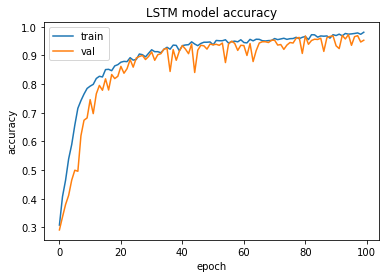

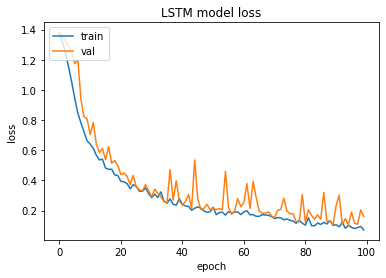

In [81]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

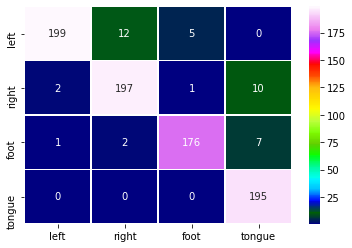

In [66]:
y_pred = [np.argmax(x) for x in lstm_model.predict(X_test)] 
y_true = [np.argmax(x) for x in y_test] 
cf = confusion_matrix(y_true, y_pred)
labels=['left','right','foot','tongue']
ax = sns.heatmap(cf,cmap="gist_ncar",vmin=0.5, linewidth=0.5, annot=True, fmt="d",xticklabels =labels,yticklabels =labels)


plt.show()

# GRU model

In [72]:
importlib.reload(GRU)
gru_model = GRU.get_model(shape = input_shape)

gru_history = gru_model.fit(X_train,y_train,validation_split=0.35,epochs=40)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 300, 14)           1596      
_________________________________________________________________
batch_normalization_44 (Batc (None, 300, 14)           56        
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 300, 14)           0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 300, 14)           0         
_________________________________________________________________
gru_13 (GRU)                 (None, 300, 7)            483       
_________________________________________________________________
batch_normalization_45 (Batc (None, 300, 7)            28        
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 300, 7)          

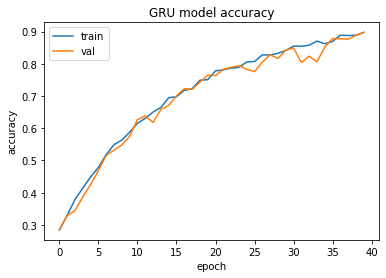

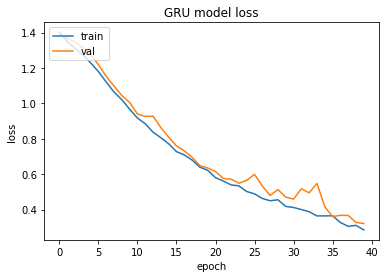

In [82]:
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('GRU model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

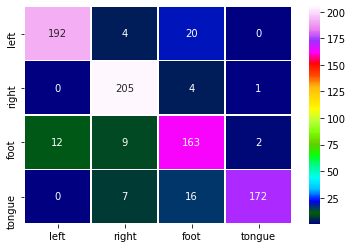

In [74]:
y_pred = [np.argmax(x) for x in gru_model.predict(X_test)] 
y_true = [np.argmax(x) for x in y_test] 
cf = confusion_matrix(y_true, y_pred)
labels=['left','right','foot','tongue']
ax = sns.heatmap(cf,cmap="gist_ncar",vmin=0.5, linewidth=0.5, annot=True, fmt="d",xticklabels =labels,yticklabels =labels)

plt.show()

# Bidirectional LSTM

In [75]:
importlib.reload(BiLSTM)
Bilstm_model = BiLSTM.get_model(shape = input_shape)

Bilstm_history = Bilstm_model.fit(X_train,y_train,validation_split=0.35,epochs=40)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 300, 14)           2072      
_________________________________________________________________
batch_normalization_46 (Batc (None, 300, 14)           56        
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 300, 14)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 300, 14)           1232      
_________________________________________________________________
batch_normalization_47 (Batc (None, 300, 14)           56        
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 300, 14)           0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 300, 14)         

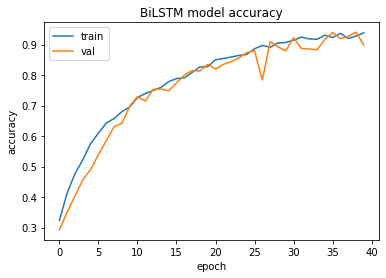

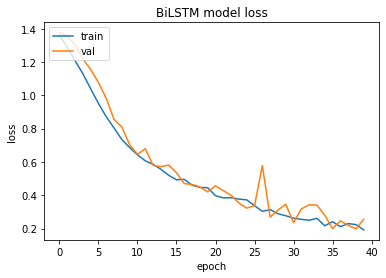

In [83]:

plt.plot(Bilstm_history.history['accuracy'])
plt.plot(Bilstm_history.history['val_accuracy'])
plt.title('BiLSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(Bilstm_history.history['loss'])
plt.plot(Bilstm_history.history['val_loss'])
plt.title('BiLSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

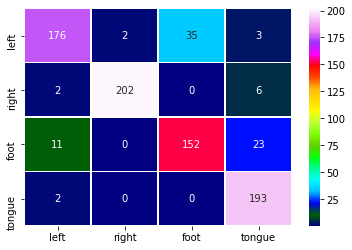

In [77]:
y_pred = [np.argmax(x) for x in Bilstm_model.predict(X_test)] 
y_true = [np.argmax(x) for x in y_test] 
cf = confusion_matrix(y_true, y_pred)
labels=['left','right','foot','tongue']
ax = sns.heatmap(cf,cmap="gist_ncar",vmin=0.5, linewidth=0.5, annot=True, fmt="d",xticklabels =labels,yticklabels =labels)

plt.show()